# ===========================================================
# Dataset visualization
# ===========================================================


#### Last update: 09 Dec 2019

# Imports

In [1]:
from __future__ import division, print_function, absolute_import, unicode_literals

import scipy as sp
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import sys
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv1D, LSTM, MaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras import regularizers

sys.path.insert(0, '../src/')
%matplotlib inline

import utils
from mytimer import Timer

/home/omid/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Parameters

In [2]:
data_fpath = '/home/omid/Datasets/Jeopardy/supervised_data.pk'
test_fraction = 0.2
runs = 30

# Helper functions

In [77]:
def get_normalized_influence_on_others(A: np.ndarray, index: int) -> float:
    A = np.array(A)
    return sum(
        A[[i for i in range(len(A))
           if i != index], index])

# Loading the data

In [11]:
data = utils.load_it(data_fpath)
print(len(data['y']))

309


In [6]:
mats = []
for i in range(len(data['y'])):
    mats.append(data['y'][i]['influence_matrix'])

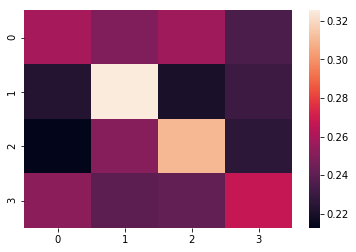

In [15]:
average_matrix = np.mean(mats, axis=0)
sns.heatmap(average_matrix);

#### Message: People mostly believe in themselves and are influence by themselves than others.

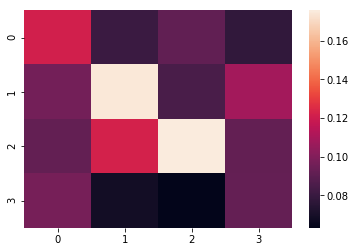

In [16]:
std_matrix = np.std(mats, axis=0)
sns.heatmap(std_matrix);

In [67]:
all_influence_items = []
for matrix in mats:
    all_influence_items.extend(np.array(matrix.flatten())[0])
all_influence_items = np.array(all_influence_items)

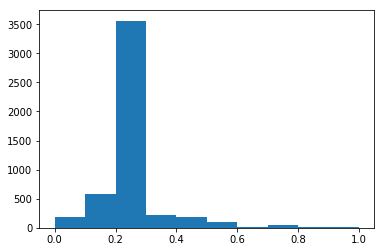

In [68]:
plt.hist(all_influence_items);

In [72]:
len(np.where(all_influence_items == 0.25)[0]) / len(all_influence_items)

0.4577265372168285

#### Message: most common influence value is 0.25. If we only say 0.25 to every item in the matrix, we are exactly correct by 45.77% of time.

# Are there always one person who is the most influential or multiple people?

In [94]:
nums = []
for matrix in mats:
    how_influential_one_is = [get_normalized_influence_on_others(matrix, index) for index in range(4)]
#     np.argmax(how_influential_one_is)
    nums.append(
        len(np.where(how_influential_one_is == max(how_influential_one_is))[0]))

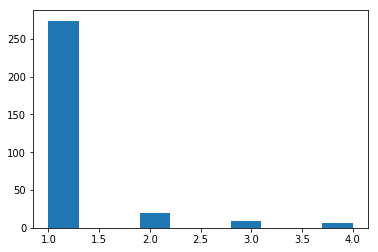

In [96]:
plt.hist(nums);

#### Message: It is good. Mostly there is one person who is the most influential and not multiple people.

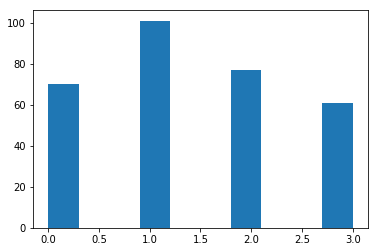

In [99]:
# Who is the most influential?
infl = []
for matrix in mats:
    how_influential_one_is = [get_normalized_influence_on_others(matrix, index) for index in range(4)]
    infl.append(np.argmax(how_influential_one_is))
plt.hist(infl);

#### Message: It is good. Every four people are influential at different teams and times.